Prepare rules for the all the data sets 

1) Try different values of support and confidence.Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

### Importing Libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

### EDA

In [54]:
Books=pd.read_csv("book.csv")
Books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [55]:
Data=Books

In [56]:
for i in Data.columns:
    print(i)
    print(Data[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



# Model 1

## Apriori Algorithm

##### min_support=10%

In [57]:
Apriori1=apriori(Data,min_support=0.1,use_colnames=True)

C:\Users\Vivek\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [58]:
Apriori1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


##### Visualization

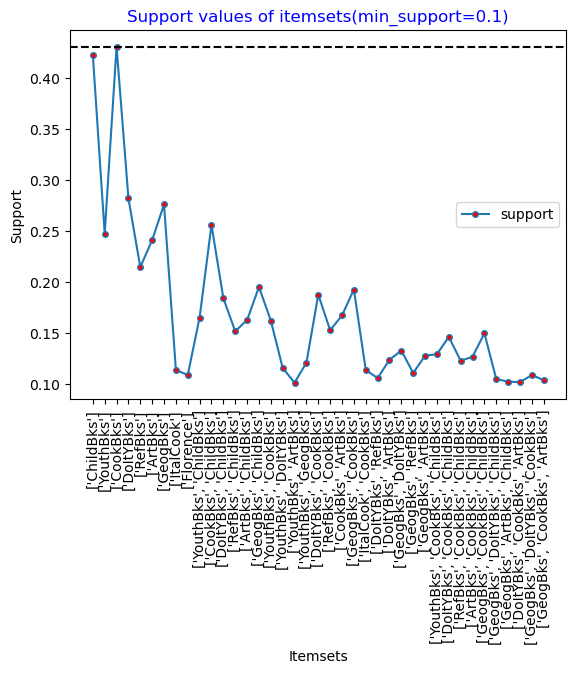

In [59]:
x=map(lambda itemset:str(list(itemset)),Apriori1['itemsets'])
plt.plot(list(x),Apriori1['support'],linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="support")
plt.xticks(rotation='vertical')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Support values of itemsets(min_support=0.1)",c='b')
plt.axhline(y=max(Apriori1['support']),c='k',linestyle="--")
plt.legend()
plt.show()

## Association Rules

In [60]:
Rule=association_rules(Apriori1,metric='lift',min_threshold=1.2)
Rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


#### Visualization

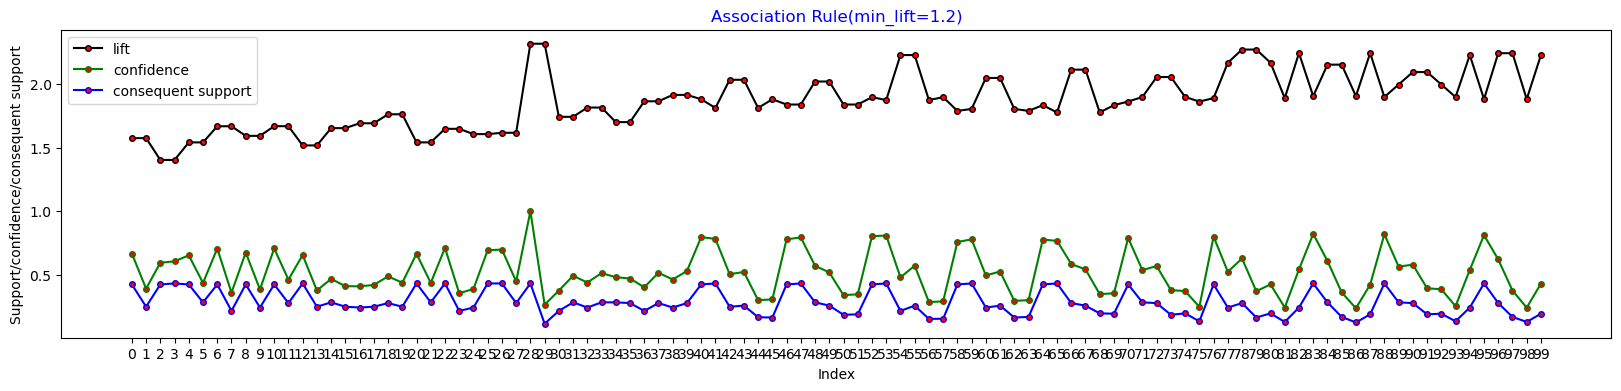

In [61]:
plt.figure(figsize=(20,4))
plt.plot(Rule["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule["consequent support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="consequent support")
plt.xticks(range(0,100))
plt.xlabel("Index")
plt.ylabel("Support/confidence/consequent support")
plt.title("Association Rule(min_lift=1.2)",c='b')
plt.legend()
plt.show()

In [62]:
Rule2=association_rules(Apriori1,metric='confidence',min_threshold=0.5)
Rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


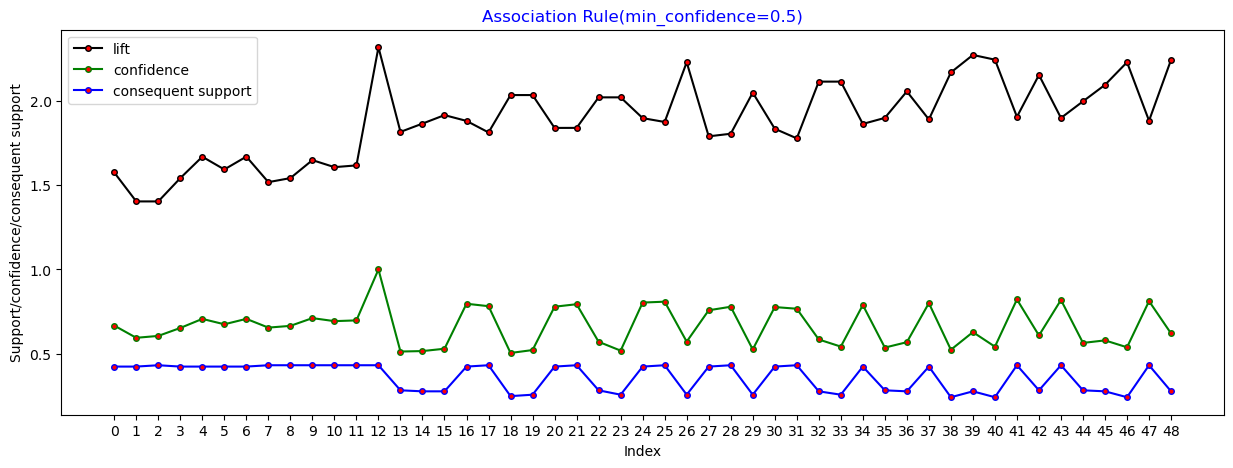

In [63]:
plt.figure(figsize=(15,5))
plt.plot(Rule2["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule2["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule2["consequent support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="consequent support")
plt.xticks(range(0,49))
plt.xlabel("Index")
plt.ylabel("Support/confidence/consequent support")
plt.title("Association Rule(min_confidence=0.5)",c='b')
plt.legend()
plt.show()

### MODEL 2

## Apriori Algorithm

In [64]:
Apriori2=apriori(Data,min_support=0.2,use_colnames=True)
Apriori2

C:\Users\Vivek\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


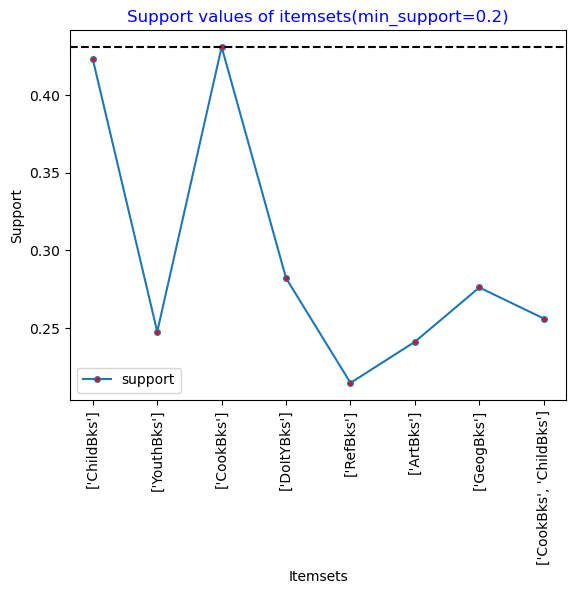

In [65]:
x=map(lambda itemset:str(list(itemset)),Apriori2['itemsets'])
plt.plot(list(x),Apriori2['support'],linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="support")
plt.xticks(rotation='vertical')
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Support values of itemsets(min_support=0.2)",c='b')
plt.axhline(y=max(Apriori2['support']),c='k',linestyle="--")
plt.legend()
plt.show()

## Association Rule

In [66]:
Rule3=association_rules(Apriori2,metric="lift",min_threshold=1.3)
Rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


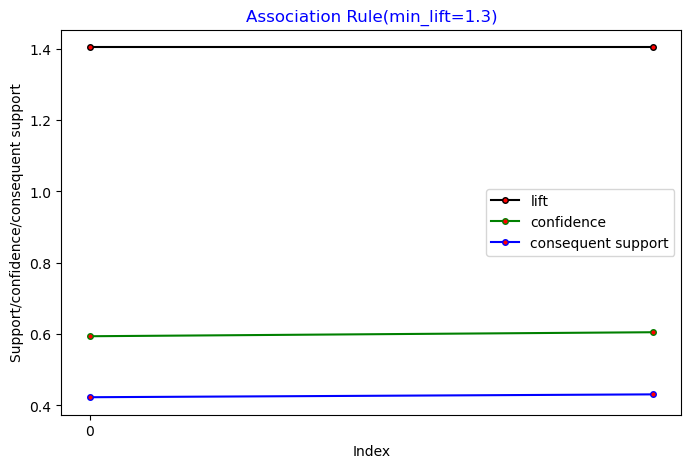

In [67]:
plt.figure(figsize=(8,5))
plt.plot(Rule3["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule3["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule3["consequent support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="consequent support")
plt.xticks(range(0,1))
plt.xlabel("Index")
plt.ylabel("Support/confidence/consequent support")
plt.title("Association Rule(min_lift=1.3)",c='b')
plt.legend()
plt.show()

In [68]:
Rule4=association_rules(Apriori1,metric='confidence',min_threshold=0.6)
Rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
5,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
7,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
9,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


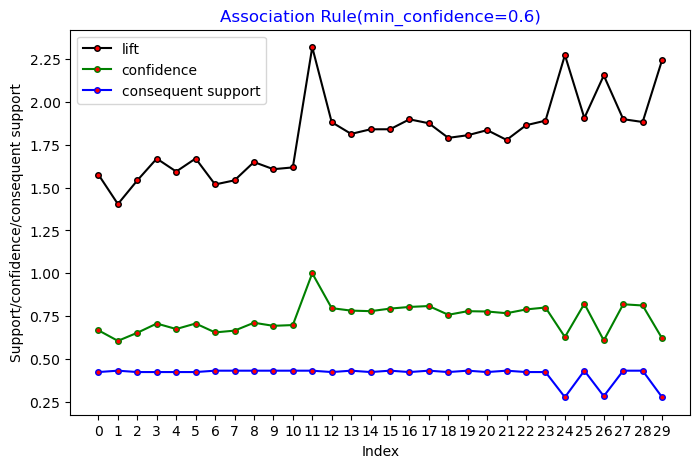

In [69]:
plt.figure(figsize=(8,5))
plt.plot(Rule4["lift"],c='k',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="lift")
plt.plot(Rule4["confidence"],c='g',linestyle='solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="confidence")
plt.plot(Rule4["consequent support"],c='b',linestyle = 'solid', marker = 'o',
         markerfacecolor = 'red', markersize = 4,label="consequent support")
plt.xticks(range(0,30))
plt.xlabel("Index")
plt.ylabel("Support/confidence/consequent support")
plt.title("Association Rule(min_confidence=0.6)",c='b')
plt.legend()
plt.show()